In [1]:
import matplotlib.pyplot as plt
import numpy as np
tartanvo_est_path = "results/experiments/kitti_tartanvo_1914_original.txt"
tartanvo_rain_path = "results/experiments/kitti_tartanvo_1914_rain.txt"
tartanvo_de_rain_path = "results/experiments/kitti_tartanvo_1914_rain_removed.txt"

dfvo_est_path = "/home/ntsai/repos/DF-VO/result/kitti_10/10.txt"
dfvo_rain_path = "/home/ntsai/repos/DF-VO/result/kitti_10_rain/10_rain.txt"
dfvo_de_rain_path = "/home/ntsai/repos/DF-VO/result/kitti_10_rain_removed/10_rain_removed.txt"
gt_path = "data/KITTI_10/10.txt"

In [2]:
def plot_traj(gtposes, estposes, labels, vis=False, savefigname=None, title="Trajectory"):
    fig = plt.figure(figsize=(4,4))
    cm = plt.cm.get_cmap('Spectral')

    plt.subplot(111)
    plt.plot(gtposes[:, 0],gtposes[:, 1], linestyle='dashed',c='k', label="Ground Truth")
    for estpose, label in zip(estposes, labels):
        plt.plot(estpose[:, 0], estpose[:, 1], label=label, alpha=0.8)
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.legend()
    plt.title(title)
    # Set correct scale
    # plt.axis('scaled')
    if savefigname is not None:
        plt.savefig(savefigname, bbox_inches='tight', dpi=300)
    if vis:
        plt.show()
    plt.close(fig)

In [3]:
from transform_format import transform

tartanvo_est = np.loadtxt(tartanvo_est_path)
tartanvo_rain_est = np.loadtxt(tartanvo_rain_path)
tartanvo_de_rain_est = np.loadtxt(tartanvo_de_rain_path)

gt = np.loadtxt(gt_path)
gt = transform(gt, "kitti", "tartan")

dfvo_est = np.loadtxt(dfvo_est_path)
dfvo_est = transform(dfvo_est, "df", "tartan")
dfvo_rain_est = np.loadtxt(dfvo_rain_path)
dfvo_rain_est = transform(dfvo_rain_est, "df", "tartan")
dfvo_de_rain_est = np.loadtxt(dfvo_de_rain_path)
dfvo_de_rain_est = transform(dfvo_de_rain_est, "df", "tartan")

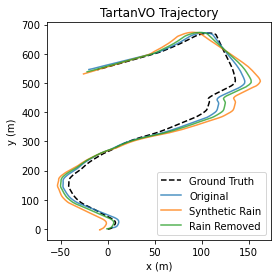

In [8]:
plot_traj(gt, [tartanvo_est, tartanvo_rain_est, tartanvo_de_rain_est], ["Original", "Synthetic Rain", "Rain Removed"], True, savefigname="results/images/tartanvo_trajectory.png", title="TartanVO Trajectory")

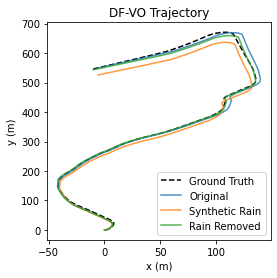

In [9]:
plot_traj(gt, [dfvo_est, dfvo_rain_est, dfvo_de_rain_est], ["Original", "Synthetic Rain", "Rain Removed"], True, savefigname="results/images/dfvo_trajectory.png", title="DF-VO Trajectory")

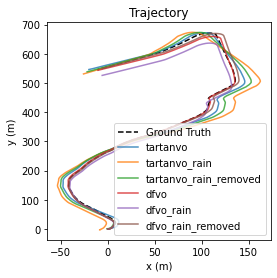

In [10]:
plot_traj(gt, [tartanvo_est, tartanvo_rain_est, tartanvo_de_rain_est, dfvo_de_rain_est, dfvo_rain_est, dfvo_est], ["tartanvo", "tartanvo_rain", "tartanvo_rain_removed", "dfvo", "dfvo_rain", "dfvo_rain_removed"], True, savefigname="results/images/all_trajectory.png")

In [ ]:
from evaluator.tartanair_evaluator import TartanAirEvaluator



for est_poses, name in zip([tartanvo_est, tartanvo_rain_est, tartanvo_de_rain_est, dfvo_est, dfvo_rain_est, dfvo_de_rain_est], ["tartanvo", "tartanvo_rain", "tartanvo_rain_removed", "dfvo", "dfvo_rain", "dfvo_rain_removed"]):
    print(name)
    evaluator = TartanAirEvaluator()
    results = evaluator.evaluate_one_trajectory(gt, est_poses, scale=False, kittitype=True)
    print("==> ATE: %.4f,\t KITTI-R/t: %.4f, %.4f" %(results['ate_score'], results['kitti_score'][0], results['kitti_score'][1]))